# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.179794e+01     6.952024e+00
 * time: 0.0047910213470458984
     1     2.765548e+01     5.912008e+00
 * time: 0.01384282112121582
     2     2.522495e+01     8.195316e+00
 * time: 0.03476691246032715
     3     1.353520e+01     1.978149e+00
 * time: 0.06301403045654297
     4     1.314812e+01     2.961722e+00
 * time: 0.1347498893737793
     5     1.245889e+01     1.846392e+00
 * time: 0.1521928310394287
     6     1.176255e+01     1.697996e+00
 * time: 0.16977787017822266
     7     1.112849e+01     2.462306e+00
 * time: 0.18717193603515625
     8     1.041438e+01     1.451737e+00
 * time: 0.2041628360748291
     9     9.875082e+00     7.805923e-01
 * time: 0.22093582153320312
    10     9.594847e+00     6.356278e-01
 * time: 0.2375478744506836
    11     9.464428e+00     2.841395e-01
 * time: 0.25463294982910156
    12     9.409000e+00     6.077941e-01
 * time: 0.26742100715637207
    13     9.369014e+00     3.100637e-01
 * time: 0

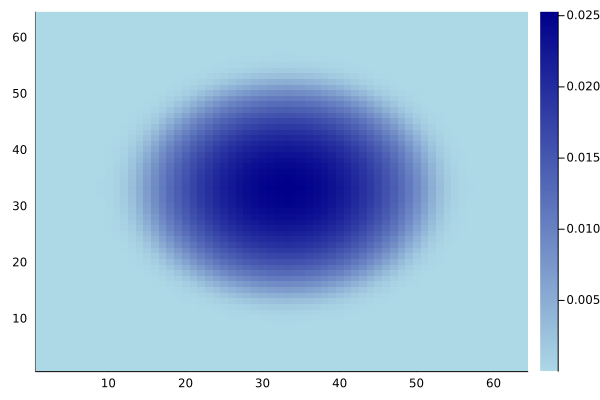

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)